<a href="https://colab.research.google.com/github/bhavani12860/Fmml-labs/blob/main/Copy_of_Mod3_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance
#### Module Coordinator: Jashn Arora

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [ ]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [ ]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
import numpy as np

def knn(train_data, train_labels, test_data, k):
    """
    K-Nearest Neighbors function.

    Parameters:
    train_data (numpy array): Training data features.
    train_labels (numpy array): Training data labels.
    test_data (numpy array): Test data features.
    k (int): Number of nearest neighbors.

    Returns:
    neighbors (list): K-nearest neighbors' labels.
    distances (list): Distances to K-nearest neighbors.
    """
    # Calculate Euclidean distances between test data and training data
    distances = np.sqrt(np.sum((train_data - test_data) ** 2, axis=1))

    # Get indices of k-nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get k-nearest neighbors' labels and distances
    neighbors = train_labels[k_indices]
    nearest_distances = distances[k_indices]

    return neighbors, nearest_distances

# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [ ]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

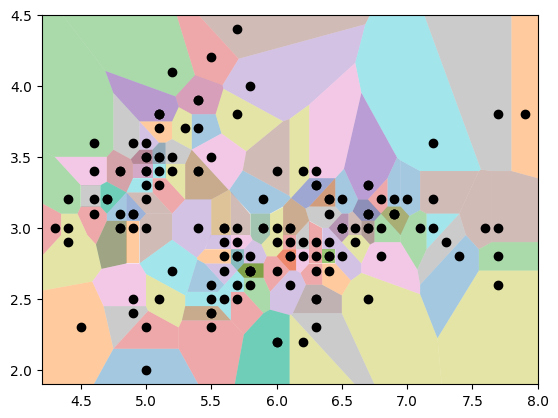

In [ ]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()

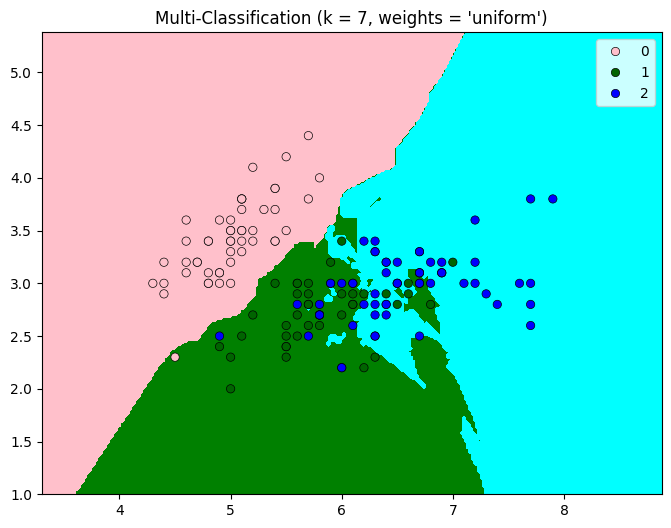

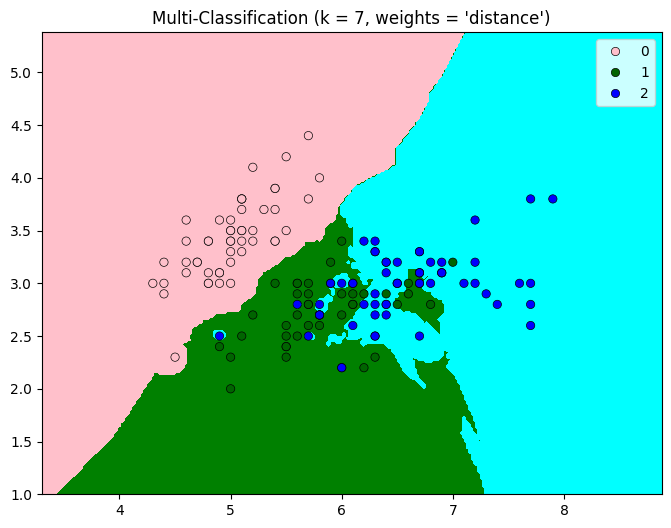

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

<Figure size 800x600 with 0 Axes>

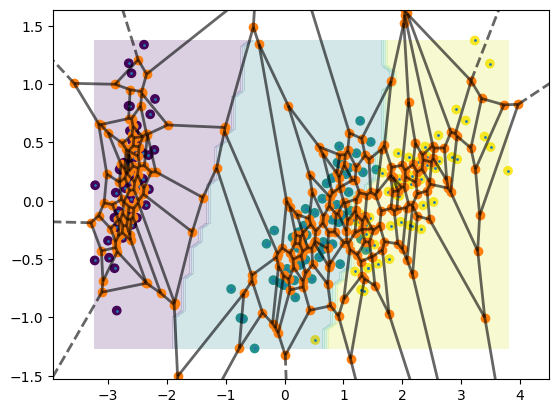

In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Assume 'df' is your dataset

# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df.drop('target', axis=1))

# Separate features and target
X_pca = pca_df
y = df['target']

# Create Voronoi object
vor = Voronoi(X_pca)

# Plot Voronoi regions
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

# Plot KNN decision boundaries
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)

plt.show()

## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

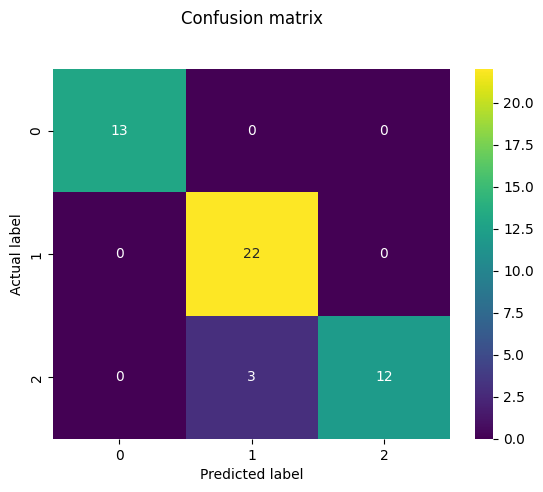

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [ ]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
car_df = pd.read_csv('heart.csv')
car_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

NameError: name 'car_df' is not defined

In [ ]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 44.26 %


Accuracy: 0.9739884393063584
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      0.94      0.96        83
           2       0.62      0.91      0.74        11
           3       0.93      0.82      0.88        17

    accuracy                           0.97       346
   macro avg       0.89      0.92      0.89       346
weighted avg       0.98      0.97      0.98       346



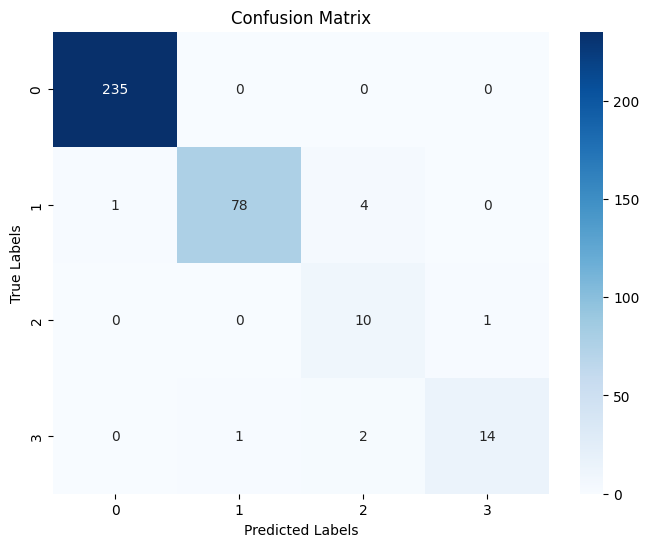

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Load Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
df = pd.read_csv(url, header=None)

# Define column names
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Convert categorical variables to numerical variables
df["buying"] = df["buying"].map({"vhigh": 0, "high": 1, "med": 2, "low": 3})
df["maint"] = df["maint"].map({"vhigh": 0, "high": 1, "med": 2, "low": 3})
df["doors"] = df["doors"].map({"5more": 5, "4": 4, "3": 3, "2": 2})
df["persons"] = df["persons"].map({"more": 5, "4": 4, "3": 3, "2": 2})
df["lug_boot"] = df["lug_boot"].map({"big": 2, "med": 1, "small": 0})
df["safety"] = df["safety"].map({"high": 2, "med": 1, "low": 0})
df["class"] = df["class"].map({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})

# Define features and target
X = df.drop("class", axis=1)
y = df["class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<Figure size 800x600 with 0 Axes>

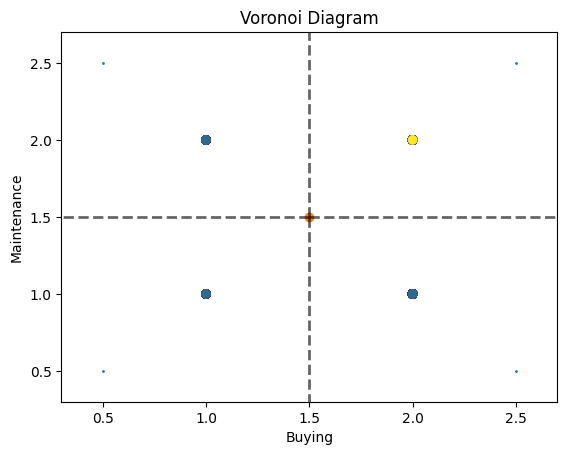

In [59]:
##Task-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
df = pd.read_csv(url, header=None)

# Define column names
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Convert categorical variables to numerical variables
df["buying"] = df["buying"].map({"vhigh": 0, "high": 1, "med": 2, "low": 3})
df["maint"] = df["maint"].map({"vhigh": 0, "high": 1, "med": 2, "low": 3})
df["doors"] = df["doors"].map({"5more": 5, "4": 4, "3": 3, "2": 2})
df["persons"] = df["persons"].map({"more": 5, "4": 4, "3": 3, "2": 2})
df["lug_boot"] = df["lug_boot"].map({"big": 2, "med": 1, "small": 0})
df["safety"] = df["safety"].map({"high": 2, "med": 1, "low": 0})
df["class"] = df["class"].map({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})

# Define features and target
X = df[["buying", "maint"]]
y = df["class"]

# Train a KMeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Create Voronoi object
vor = Voronoi(kmeans.cluster_centers_)

# Plot Voronoi regions
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

# Plot data points
plt.scatter(X["buying"], X["maint"], c=y)

plt.xlabel("Buying")
plt.ylabel("Maintenance")
plt.title("Voronoi Diagram")
plt.show()

### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.
**ANSWER 1:-**
           In the KNN (K-Nearest Neighbors) algorithm, the `weights` parameter determines how the neighbors' votes are combined to predict the target variable.

*Uniform Weights (`weights='uniform'`):*

- Each neighbor's vote has equal weight.
- The predicted class is the most common class among the k-nearest neighbors.
- All neighbors are treated equally, regardless of their distance from the query point.

*Distance-based Weights (`weights='distance'`):*

- Each neighbor's vote is weighted by its inverse distance from the query point.
- Closer neighbors have more influence on the prediction.
- The predicted class is determined by the weighted majority vote.

*Key differences:*

1. *Voting scheme*: Uniform weights use a simple majority vote, while distance-based weights use a weighted vote.
2. *Neighbor influence*: Uniform weights treat all neighbors equally, while distance-based weights give more importance to closer neighbors.
3. *Robustness to noise*: Distance-based weights can be more robust to noisy data, as closer neighbors have more influence.

*Example:*

Suppose we have 5 nearest neighbors with classes {A, B, A, A, B} and distances {0.1, 0.3, 0.2, 0.05, 0.4}.

Uniform weights:

- Class A: 3 votes
- Class B: 2 votes
- Predicted class: A

Distance-based weights:

- Class A: 0.5 + 0.4 + 0.8 = 1.7
- Class B: 0.2 + 0.1 = 0.3
- Predicted class: A

In this example, the distance-based weights give more importance to the closest neighbor (0.05 distance), which reinforces the prediction of class A.

*Choosing the right weights:*

- Use uniform weights when all neighbors are equally important.
- Use distance-based weights when closer neighbors are more relevant.

2. What do you think could be the drawbacks of using KNN ?
**ANSWER 2:-**
        
Here are some drawbacks of using K-Nearest Neighbors (KNN):

*Computational Complexity*

1. *Scalability*: KNN can be slow for large datasets, as it requires calculating distances between all data points.
2. *High-Dimensional Data*: KNN struggles with high-dimensional data, leading to decreased performance.

*Data Quality Issues*

1. *Noise and Outliers*: KNN is sensitive to noisy data and outliers, which can affect accuracy.
2. *Imbalanced Datasets*: KNN can be biased towards the majority class in imbalanced datasets.

*Model Limitations*

1. *Non-Parametric*: KNN is a non-parametric model, which can lead to overfitting.
2. *Lack of Interpretability*: KNN's decision-making process is difficult to interpret.

*Other Drawbacks*

1. *Choice of k*: Selecting the optimal value of k can be challenging.
2. *Distance Metric*: Choosing the right distance metric is crucial, but can be dataset-dependent.
3. *Sensitive to Feature Scaling*: KNN is sensitive to feature scaling, which can affect performance.

*Real-World Implications*

1. *Data Privacy*: KNN can be vulnerable to data privacy issues, as it requires access to entire dataset.
2. *Real-Time Applications*: KNN may not be suitable for real-time applications due to computational complexity.

To mitigate these drawbacks, consider:

1. *Data preprocessing*: Normalize/standardize features, handle missing values, and remove outliers.
2. *Dimensionality reduction*: Apply techniques like PCA or t-SNE to reduce dimensionality.
3. *Weighted KNN*: Use weighted KNN to give more importance to closer neighbors.
4. *Ensemble methods*: Combine KNN with other models to improve performance.
5. *Optimization techniques*: Use optimization techniques, like KD-trees or ball trees, to improve computational efficiency.

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
